# Getting Data

First, we want to grab some graphs and subject covariates from a web-accessible url.  We've given this to you on github rather than having you set up aws s3 credentials or asking you to mount data in colab, in the interest of saving time. The original data is hosted at m2g.io

Below, you will be getting the following dataset:

| Property | Value |
|:--------:|:-----:|
| Dataset  | SWU4  |
| N-Subjects  | 454   |
| Scans-per-subjects | 2 |
| Atlases | Desikan, CPAC200 |
| Desikan Nodes | 70 |
| CPAC200 Nodes | 200 |

The covariates you have are: `SUBID, SESSION, AGE_AT_SCAN_1, SEX, RESTING_STATE_INSTRUCTION, TIME_OF_DAY, SEASON, SATIETY, LMP`. There are other columns in the `.csv` file (downloaded in the next step) but they are populated with a `#` meaning that the value was not recorded.

There are several other atlases available - you can change which one you use
Running the cell below will get you the data. **Please note, you only have to run these two cells once!!!**

## Loading Graphs + Covariates
Run the following cells of code to load the graphs into your computer, as well as the covariates.

In [1]:
#!pip install networkx

import numpy as np
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
import os
import csv
from collections import OrderedDict
import glob

In [2]:
# get code and data
!git clone https://github.com/wrgr/graph-explorer.git

Cloning into 'graph-explorer'...
remote: Enumerating objects: 1147, done.
remote: Counting objects: 100% (1147/1147), done.
remote: Compressing objects: 100% (1142/1142), done.
remote: Total 1147 (delta 11), reused 1128 (delta 3), pack-reused 0
Receiving objects: 100% (1147/1147), 15.53 MiB | 14.05 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
# set paths
ps = "graph-explorer/SWU4-matched.csv"

# Initializing dataset names
dataset_names = 'swu-data'
basepath = 'graph-explorer'

atlas = 'desikan' # only desikan for now - but can extend to other atlases

In [4]:

dir_names = basepath + '/' + dataset_names + '/' + atlas
print(dir_names)
fs = sorted(glob.glob(dir_names + '/*.csv'))

print("Total Subjects: %d" % len(fs))



graph-explorer/swu-data/desikan
Total Subjects: 207


In [5]:
# load graphs - note that this process requires alignment of labels and graphs by file name, so is brittle for general practice.
graphs = OrderedDict()
i = 0
for f in fs:
  graphs[i] = nx.read_weighted_edgelist(f)
  i = i+1

In [6]:
import pandas as pd
import csv

# This gets age and sex, respecitvely.
attributes = pd.read_csv(ps)

depvar = attributes['SEX']

## ASSIGNMENT:  
(Code above used to get data in the correct format.  Below is a simple example test string with kind of silly features)

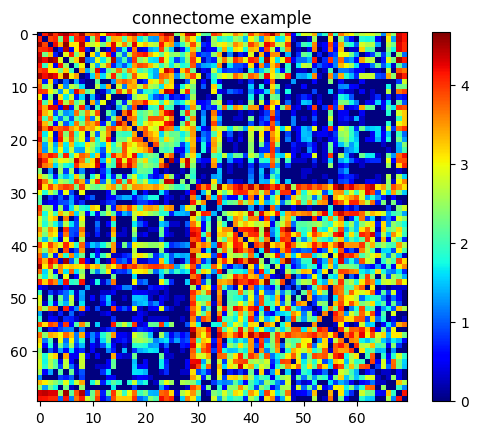

In [7]:
# plot a graph
import matplotlib.pyplot as plt
%matplotlib inline
i = 10
# convert to numpy
matrix = nx.to_numpy_array(graphs[i], nodelist=sorted(graphs[i].nodes())) #this is how you go to a matrix

plt.imshow(np.log10(matrix+1),cmap='jet')
plt.colorbar()
plt.title('connectome example')
plt.show()

In [8]:
# Criteria 1 (25 points) compute and visualize mean connectomes for all of the data

In [9]:
# Criteria 2 (25 points) compute and visualize class conditional connectomes (e.g., male and female subpopulations)


In [10]:
# Criteria 3 (30 points) compute 5 different features related to graphs
# Criteria 4 (20 points) interpret meaning of features, with some hypothesis connecting to neuroscience (words and/or code)



In [11]:
#Develop features (examples)

X = []
for i in range(len(graphs)):
    featvec = []

    dc = nx.algorithms.degree_centrality(graphs[i])
    dcmean = np.mean(np.asarray(list(dc.values())))
    featvec.append(dcmean)

    dcall = np.asarray(list(dc.values()))
    for ii in dcall:
        featvec.append(ii)

    matrix = nx.to_numpy_array(graphs[i], nodelist=sorted(graphs[i].nodes())) #this is how you go to a matrix
    logmatrix = np.log10(np.sum(matrix,0) + 1)
    logmatrix = np.ravel(logmatrix)

    for ii in logmatrix:
        featvec.append(ii)

    xsum = np.asarray(np.sum(matrix))
    featvec.append(xsum)
    np.shape(featvec)
    X.append(featvec)


In [12]:
# Criteria 5 (30 points) build classifier and obtain classification score at 70\% or higher
# 80% should be very achievable

# separate training and test data and run classifier - you don't need to alter this cell

X_train = X[0:100]
Y_train = depvar[0:100]

X_test = X[100:]
Y_test = depvar[100:]

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

accuracy = []
for ii in range(10): #performance will change over time
    #clf = svm.SVC(gamma='scale')
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, Y_train)
    acc = (clf.predict(X_test) == Y_test)
    accval = (float(np.sum(acc))/float(len(Y_test)))
    accuracy.append(accval)
    print('Accuracy:',accval)

print('Overall Accuracy:',str(np.mean(accuracy)))

Accuracy: 0.7102803738317757
Accuracy: 0.6728971962616822
Accuracy: 0.6915887850467289
Accuracy: 0.7009345794392523
Accuracy: 0.6915887850467289
Accuracy: 0.6822429906542056
Accuracy: 0.6915887850467289
Accuracy: 0.7009345794392523
Accuracy: 0.6915887850467289
Accuracy: 0.6915887850467289
Overall Accuracy: 0.6925233644859814
